# 두 샘플을 배우기

In [12]:
import torch
from torch import nn

import matplotlib.pyplot as plt

class My_Decoder(nn.Module):
    def __init__(self, dim_decoder_input, activation="tanh"):
        super().__init__()
        if activation == "tanh":
            self.activation = torch.tanh
        self.l0 = nn.Linear(dim_decoder_input, 512)
        self.l1 = nn.Linear(512, 512)
        self.l2 = nn.Linear(512, 784)
        self.unfln = nn.Unflatten(1, [28, 28])

    def forward(self, z):
        x_hat = self.activation(self.l0(z))
        x_hat = self.activation(self.l1(x_hat))
        x_hat = torch.sigmoid(self.l2(x_hat))
        x_hat = self.unfln(x_hat)
        return x_hat


model = My_Decoder(1)
print(model)

My_Decoder(
  (l0): Linear(in_features=1, out_features=512, bias=True)
  (l1): Linear(in_features=512, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=784, bias=True)
  (unfln): Unflatten(dim=1, unflattened_size=[28, 28])
)


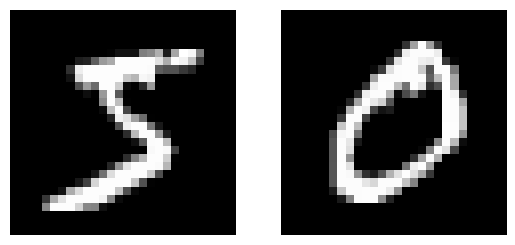

In [13]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

x = training_data.data[:2] / 255.0

_, axs = plt.subplots(nrows=1, ncols=2)
for ax, img in zip(axs, x):
    ax.imshow(img.view([28, 28]), cmap='gray')
    ax.axis('off')

In [14]:
import torch.nn.functional as F


def train(epochs, model, optimizer, sigma):
    for epoch in range(epochs):
        z = torch.randn(2, 1) * sigma
        z[1] += 3
        pred = model(z)
        loss = F.binary_cross_entropy(pred, x, reduction='sum') / len(x)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    print(loss)

def show_image_series(model, left=-3, right=6, steps=15):
    with torch.no_grad():
        z = torch.linspace(left, right, steps).view([steps, 1])
        pred = model(z)

    _, axs = plt.subplots(nrows=1, ncols=steps, figsize=[20, 5])
    for ax, img, iz in zip(axs, pred, z):
        ax.imshow(img, cmap='gray')
        ax.set_title(f'{iz.item():0.2f}')
        ax.axis('off')
    plt.tight_layout()

tensor(77.8190, grad_fn=<DivBackward0>)


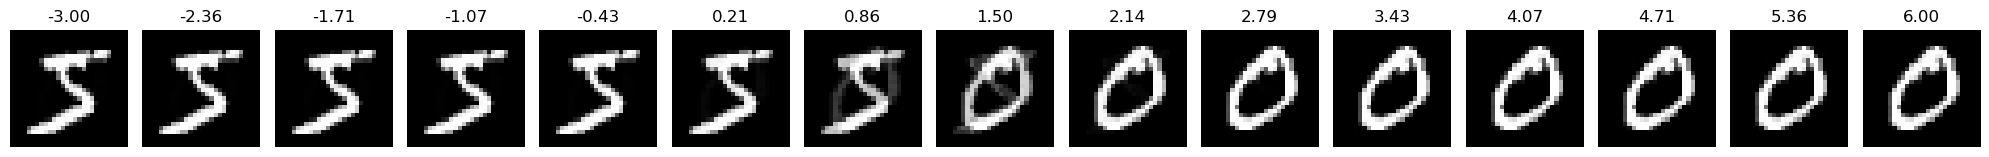

In [15]:
model = My_Decoder(1)
optimizer = torch.optim.Adam(model.parameters())
train(1000, model, optimizer, 1)
show_image_series(model)

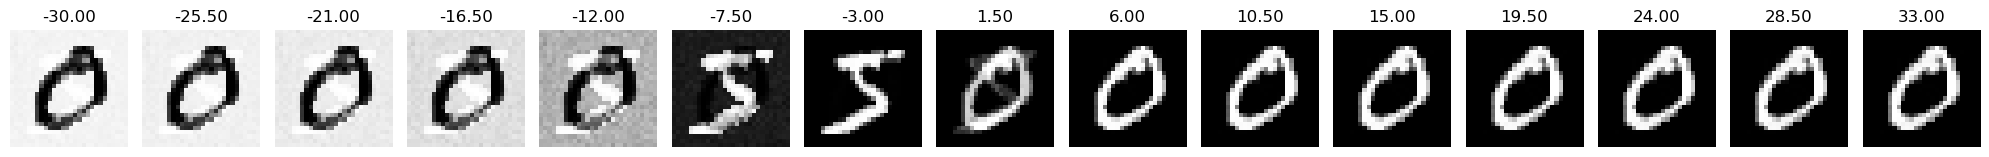

In [16]:
show_image_series(model, -30, 33)

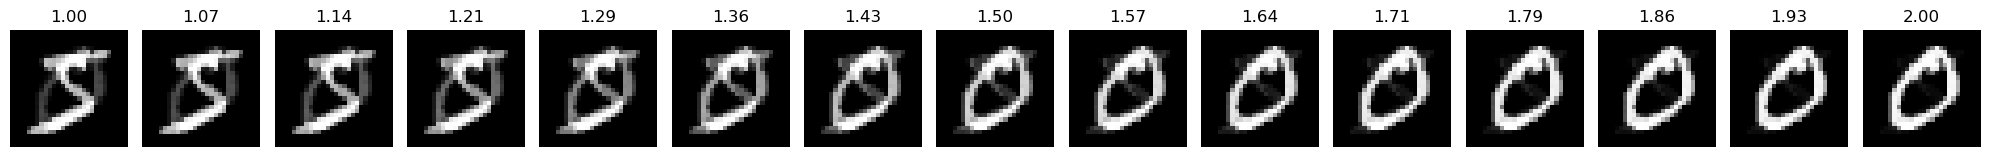

In [17]:
show_image_series(model, 1, 2)

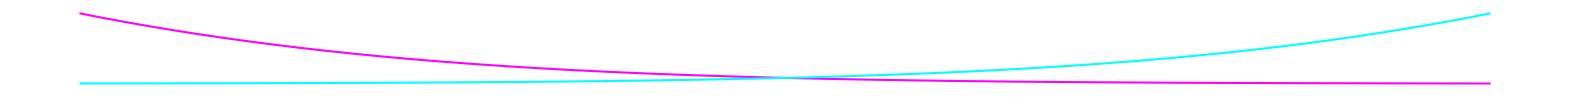

In [29]:
import torch
import matplotlib.pyplot as plt

def two_dist(mu1, sigma1, mu2, sigma2, left, right):
    d1 = torch.distributions.Normal(mu1, sigma1)
    d2 = torch.distributions.Normal(mu2, sigma2)

    x1 = torch.linspace(left, right, 300)
    x2 = torch.linspace(left, right, 300)

    y1 = d1.log_prob(x1).exp()
    y2 = d2.log_prob(x2).exp()

    fig, ax = plt.subplots(figsize=[20, 1])

    ax.plot(x1, y1, color='magenta')
    ax.plot(x2, y2, color='cyan')

    ax.axis('off')

    

two_dist(0, 0.5, 3, 0.5, 1, 2)



- 학습되지 않은 구간 (샘플링이 되지 않는 구간)의 생성은 결과의 품질을 보장하지 않는다. 그때 그때 다르다.
- 샘플링이 겹치는 구간은 두 샘플의 혼합을 보인다.

tensor(54.5007, grad_fn=<DivBackward0>)


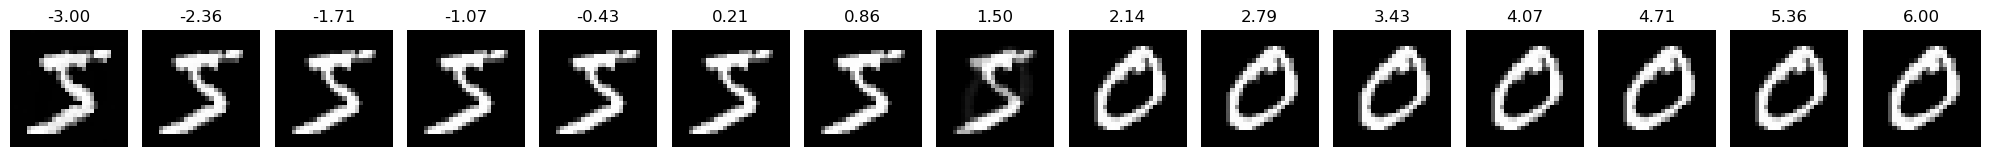

In [24]:
model = My_Decoder(1)
optimizer = torch.optim.Adam(model.parameters())
train(1000, model, optimizer, 0.5)
show_image_series(model)

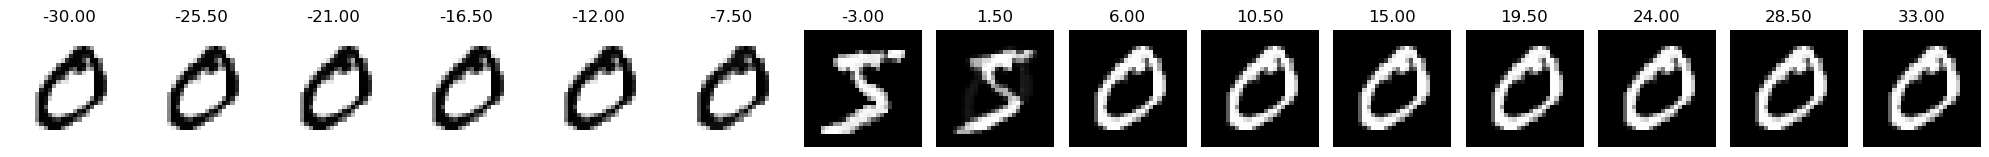

In [25]:
show_image_series(model, -30, 33)

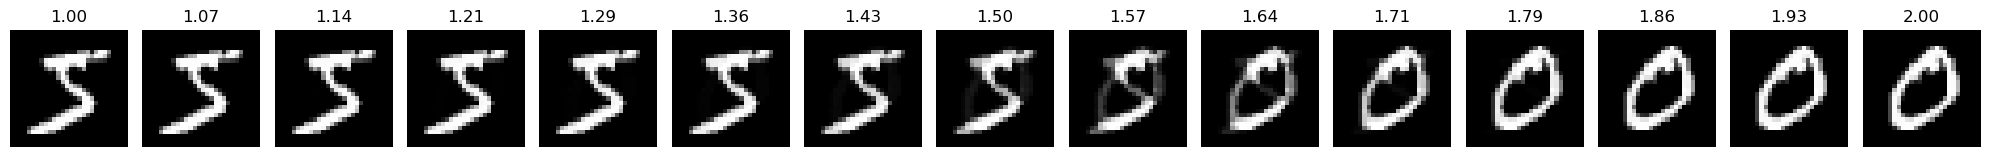

In [26]:
show_image_series(model, 1, 2)

tensor(54.4601, grad_fn=<DivBackward0>)


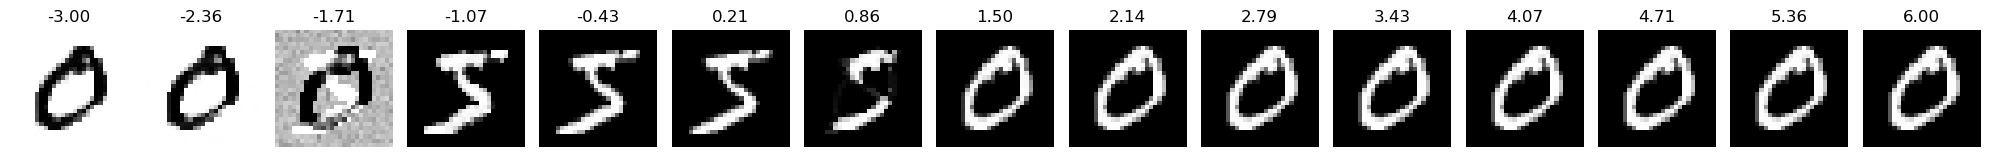

In [31]:
model = My_Decoder(1)
optimizer = torch.optim.Adam(model.parameters())
train(1000, model, optimizer, 0)
show_image_series(model)

tensor(54.4599, grad_fn=<DivBackward0>)


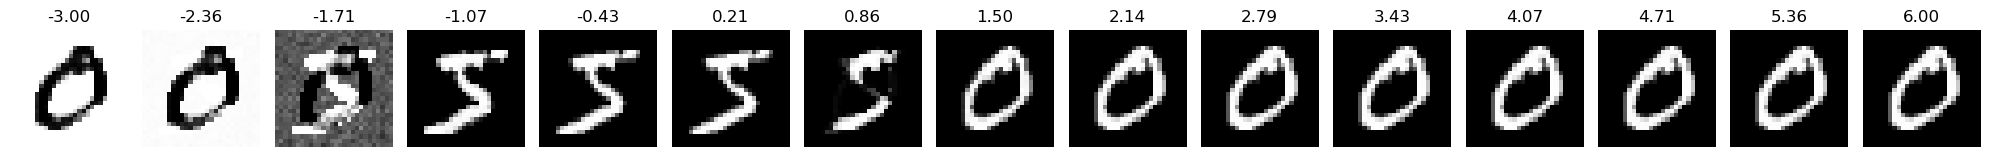

In [30]:
model = My_Decoder(1)
optimizer = torch.optim.Adam(model.parameters())
train(1000, model, optimizer, 0.0001)
show_image_series(model)

tensor(71.7128, grad_fn=<DivBackward0>)


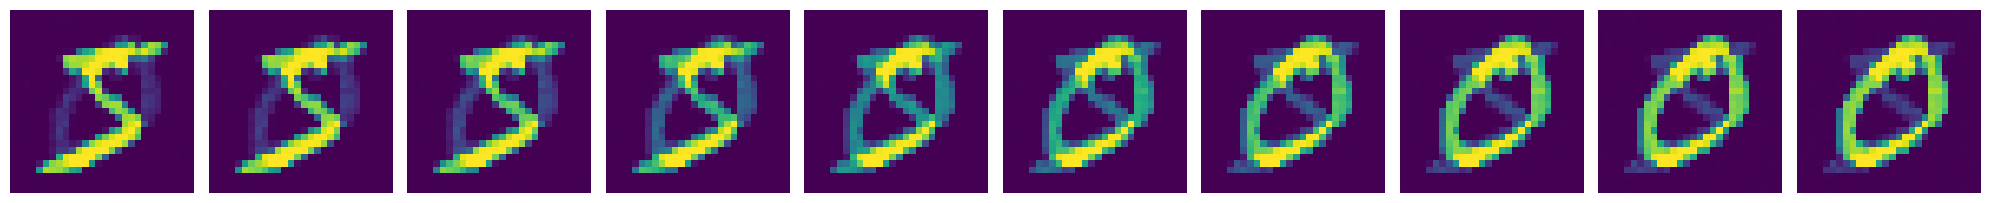

In [50]:
train(10)
show_image_series()

tensor(62.9301, grad_fn=<DivBackward0>)


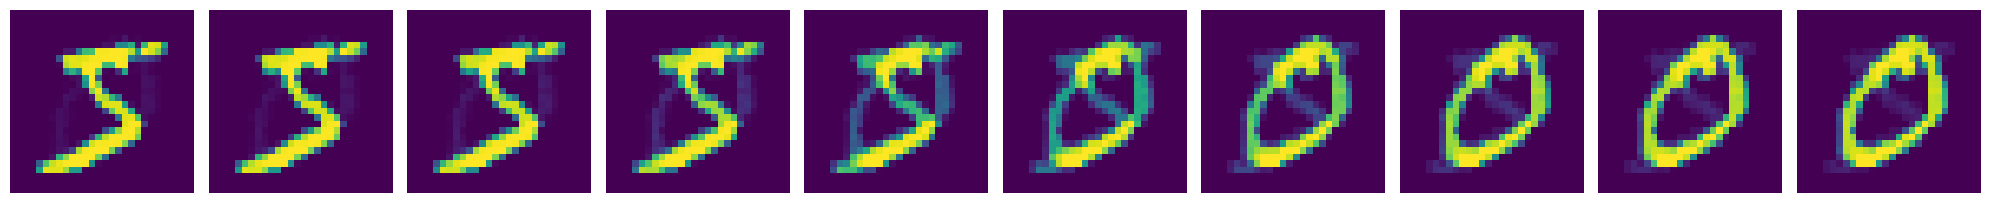

In [51]:
train(10)
show_image_series()

tensor(87.6500, grad_fn=<DivBackward0>)


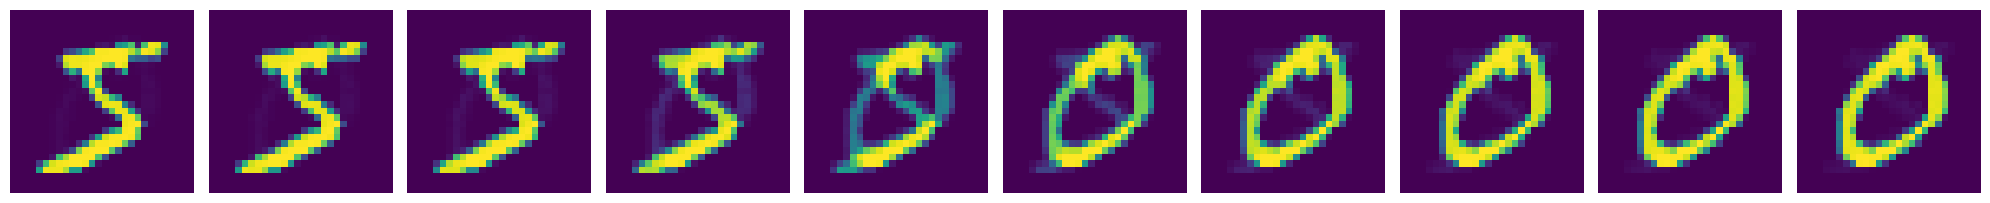

In [52]:
train(10)
show_image_series()

tensor(58.2569, grad_fn=<DivBackward0>)


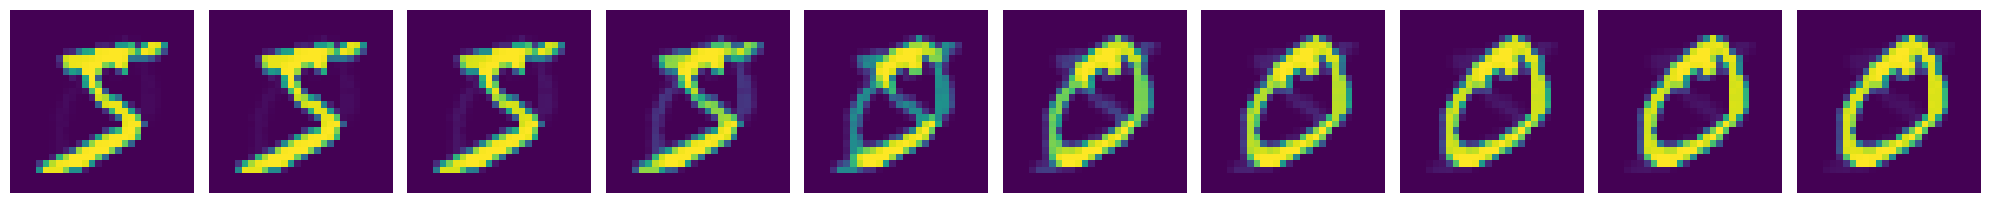

In [53]:
train(10)
show_image_series()

tensor(59.7102, grad_fn=<DivBackward0>)


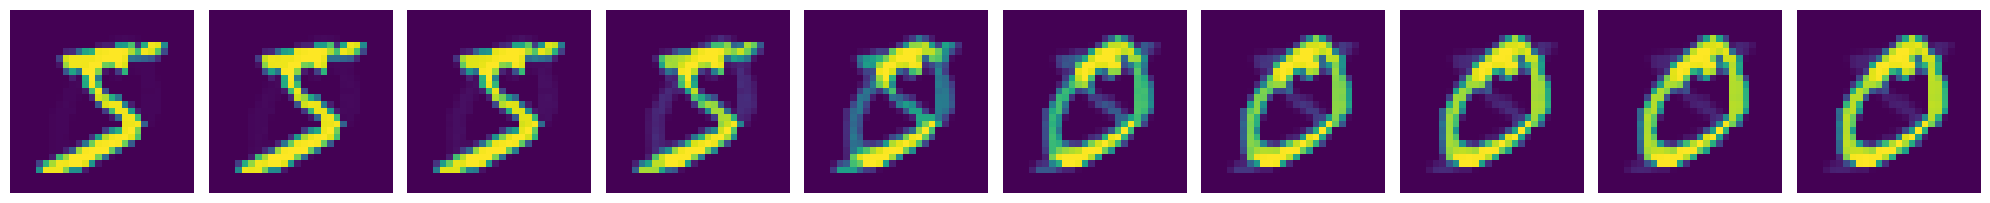

In [54]:
train(10)
show_image_series()

tensor(59.8885, grad_fn=<DivBackward0>)


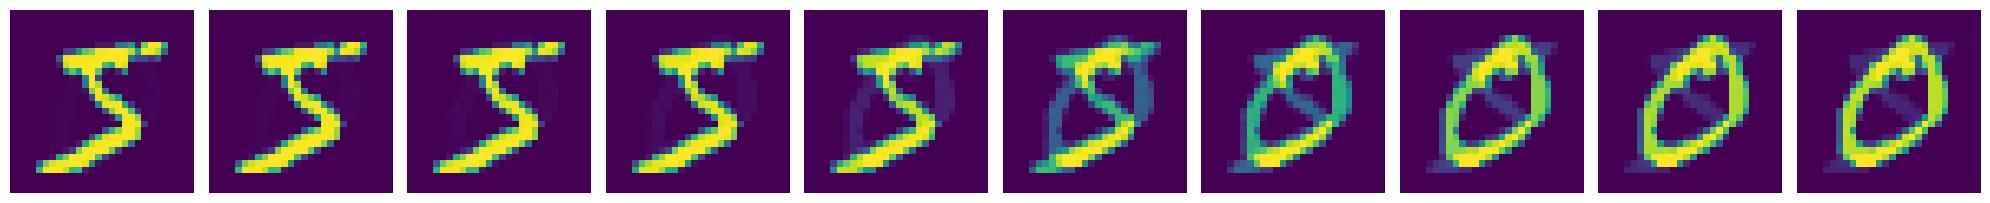

In [55]:
train(10)
show_image_series()

tensor(61.2590, grad_fn=<DivBackward0>)


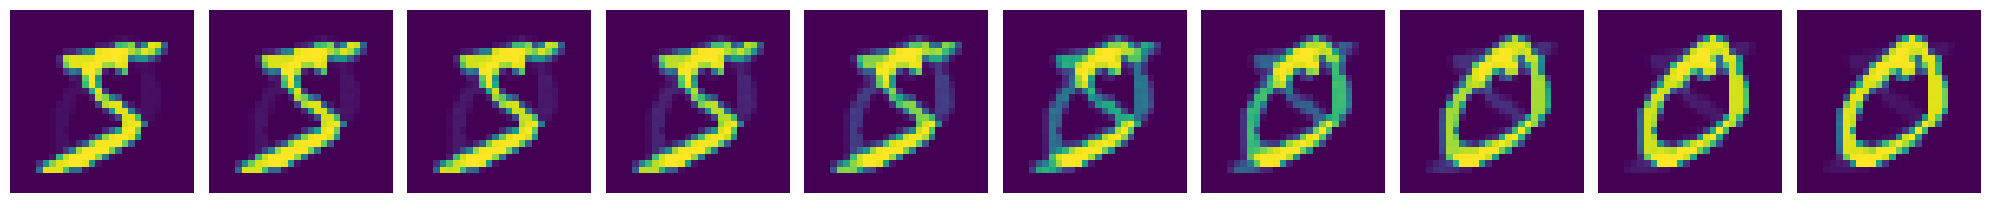

In [56]:
train(10)
show_image_series()

tensor(57.1346, grad_fn=<DivBackward0>)


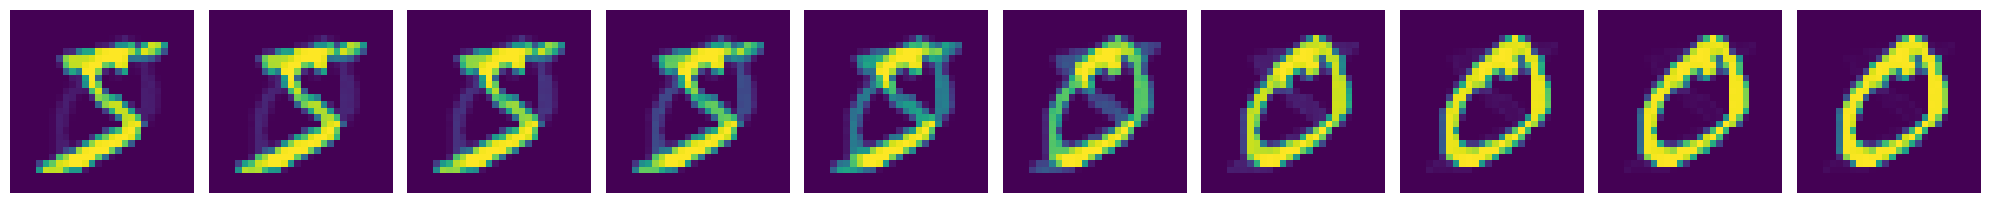

In [57]:
train(10)
show_image_series()

tensor(60.2640, grad_fn=<DivBackward0>)


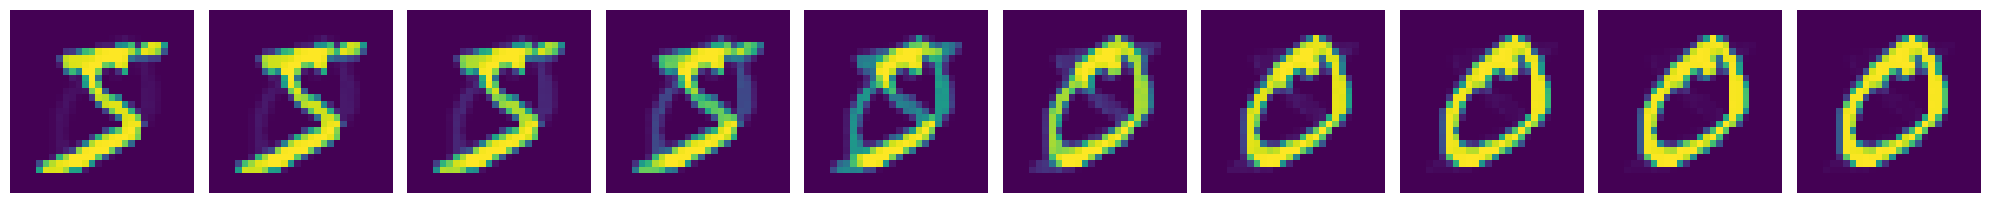

In [58]:
train(10)
show_image_series()

tensor(63.5570, grad_fn=<DivBackward0>)


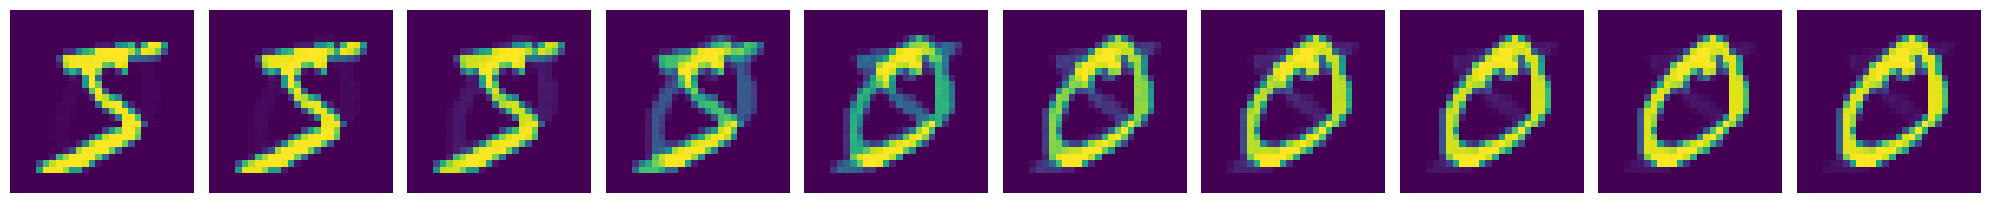

In [59]:
train(100)
show_image_series()

tensor(138.6548, grad_fn=<DivBackward0>)


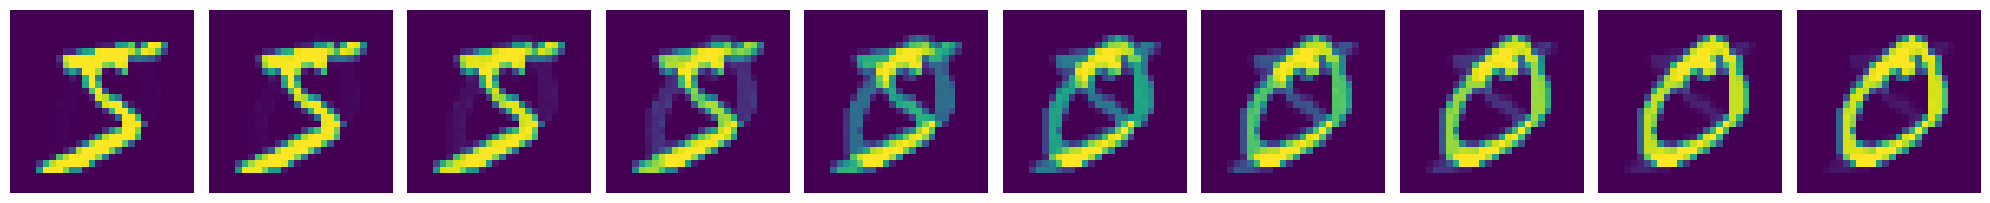

In [60]:
train(100)
show_image_series()

tensor(60.1995, grad_fn=<DivBackward0>)


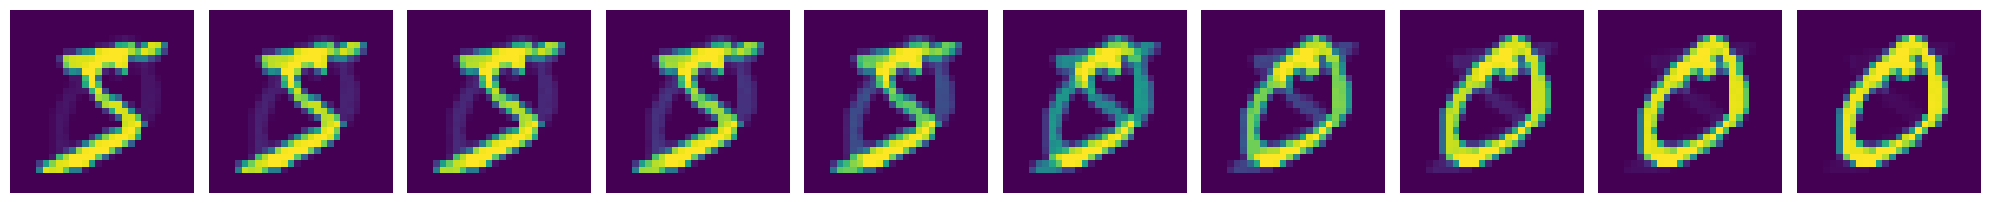

In [61]:
train(100)
show_image_series()

tensor(55.6970, grad_fn=<DivBackward0>)


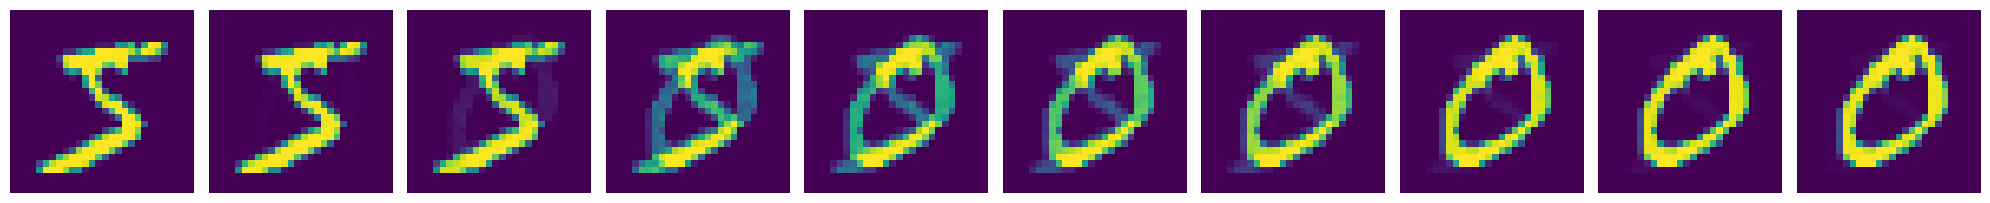

In [62]:
train(1000)
show_image_series()

tensor(55.0890, grad_fn=<DivBackward0>)


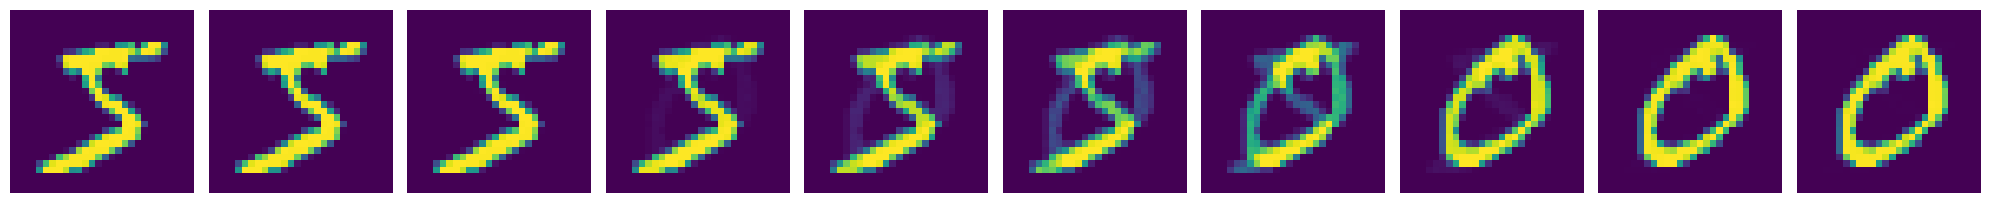

In [63]:
train(10000)
show_image_series()

### 두 샘플에서 표준편차를 작게

tensor(55.1571, grad_fn=<DivBackward0>)


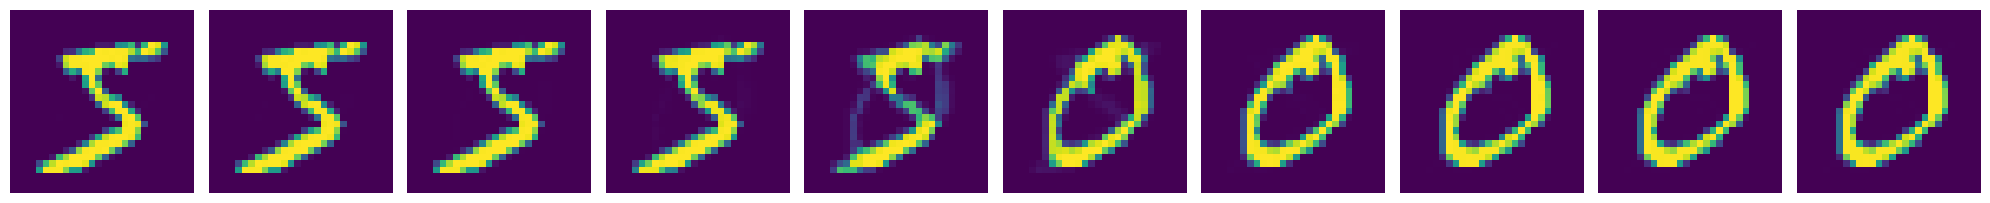

In [61]:
train(100)
show_image_series()

tensor(54.4694, grad_fn=<DivBackward0>)


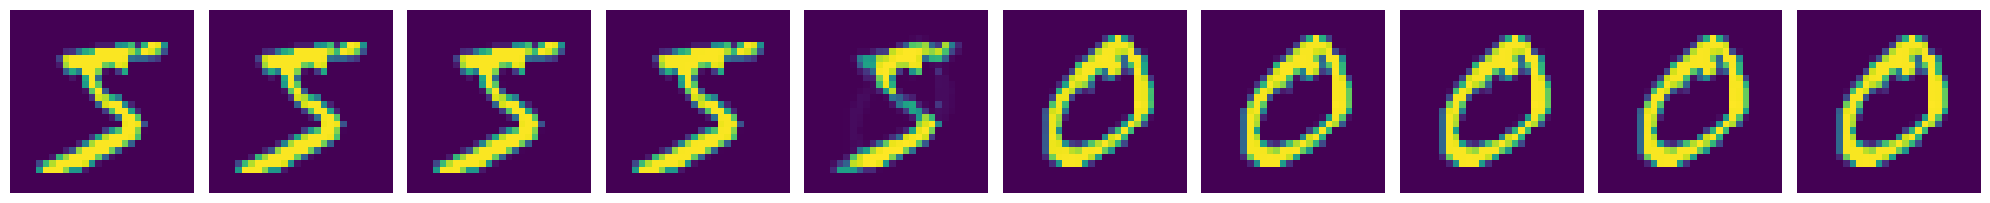

In [62]:
train(1000)
show_image_series()

## 딱 10개의 이미지를 학습한 디코더는 아주 조금이라도 숫자의 특징을 배울 수 있을까?
- 오토인코더가 피쳐를 배우는 동력이 인코딩과 디코딩이 함께 할 때만 발휘되는가?


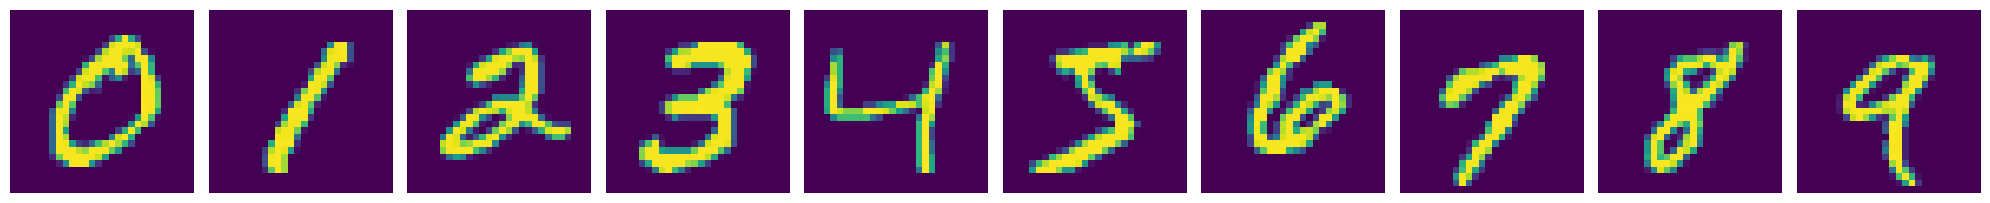

In [24]:
import torch

from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

x = torch.zeros([10, 28, 28])
count = torch.zeros(10)

idx = 0
while not (count == 1).all():
    y = training_data.targets[idx]
    if count[y] == 0:
        x[y] = training_data.data[idx] / 255.0
        count[y] = 1
    idx += 1

_, axs = plt.subplots(nrows=1, ncols=10, figsize=[20, 4])
for ax, img in zip(axs, x):
    ax.imshow(img.view([28, 28]))
    ax.axis('off')
plt.tight_layout()

In [26]:
from torch import nn

class My_Decoder(nn.Module):
    def __init__(self, dim_decoder_input, activation="tanh"):
        super().__init__()
        if activation == "tanh":
            self.activation = torch.tanh
        self.l0 = nn.Linear(dim_decoder_input, 512)
        self.l1 = nn.Linear(512, 512)
        self.l2 = nn.Linear(512, 784)
        self.unfln = nn.Unflatten(1, [28, 28])

    def forward(self, z):
        x_hat = self.activation(self.l0(z))
        x_hat = self.activation(self.l1(x_hat))
        x_hat = torch.sigmoid(self.l2(x_hat))
        x_hat = self.unfln(x_hat)
        return x_hat


model = My_Decoder(2)
print(model)

My_Decoder(
  (l0): Linear(in_features=2, out_features=512, bias=True)
  (l1): Linear(in_features=512, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=784, bias=True)
  (unfln): Unflatten(dim=1, unflattened_size=[28, 28])
)


In [43]:
d = torch.distributions.Normal(0, 1)
d.sample([10, 2])

tensor([[ 1.8464, -1.2443],
        [-0.0831, -0.9357],
        [ 0.7696,  1.6992],
        [-1.3450,  0.7145],
        [ 0.7371, -0.4404],
        [-2.5257, -0.9029],
        [ 1.2432, -0.3908],
        [-0.6721, -0.8745],
        [-0.5561, -1.5843],
        [-0.6373,  0.8326]])

In [50]:
import torch.nn.functional as F

optimizer = torch.optim.Adam(model.parameters())

ps = torch.tensor(
    [
        [  -2,    2],
        [   2, -2.5],
        [-1.5,  2.5],
        [-0.5,  1.8],
        [ 2.3,    2],
        [-0.5, -0.7],
        [-0.9,  0.3],
        [ 2.3, -0.1],
        [   0,    0],
        [ 0.2,    1],
    ],
dtype=torch.float)

def get_zs():
    z = torch.randn(10, 2)
    return z + ps

def show_images():
    with torch.no_grad():
        z = get_zs()
        pred = model(z)

    _, axs = plt.subplots(nrows=1, ncols=2)
    for ax, img in zip(axs, pred):
        ax.imshow(img)

def train(epochs=1):
    for epoch in range(epochs):
        z = get_zs()
        pred = model(z)
        loss = F.binary_cross_entropy(pred, x, reduction='sum') / len(x)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    print(loss)

def plot_generated_images(
        model, xlim=[-3, 3], xsteps=11, ylim=[-3, 3], ysteps=11, figsize=[9, 9]
    ):
        model.to("cpu")
        model.eval()

        grid_x, grid_y = torch.meshgrid(
            torch.linspace(*xlim, xsteps), torch.linspace(*ylim, ysteps), indexing="xy"
        )
        points = torch.stack([grid_x, grid_y], dim=2)

        w = 28
        n = len(points)
        img = torch.zeros((n * w, n * w))
        for i, r in enumerate(points):
            with torch.no_grad():
                tmps = model(r).view([-1, 1, 28, 28])
                for j, tmp in enumerate(tmps):
                    img[
                        (n - 1 - i) * w : (n - 1 - i + 1) * w, j * w : (j + 1) * w
                    ] = tmp[0]
        plt.figure(figsize=figsize)
        plt.axis("off")
        plt.imshow(img)

tensor(156.2461, grad_fn=<DivBackward0>)


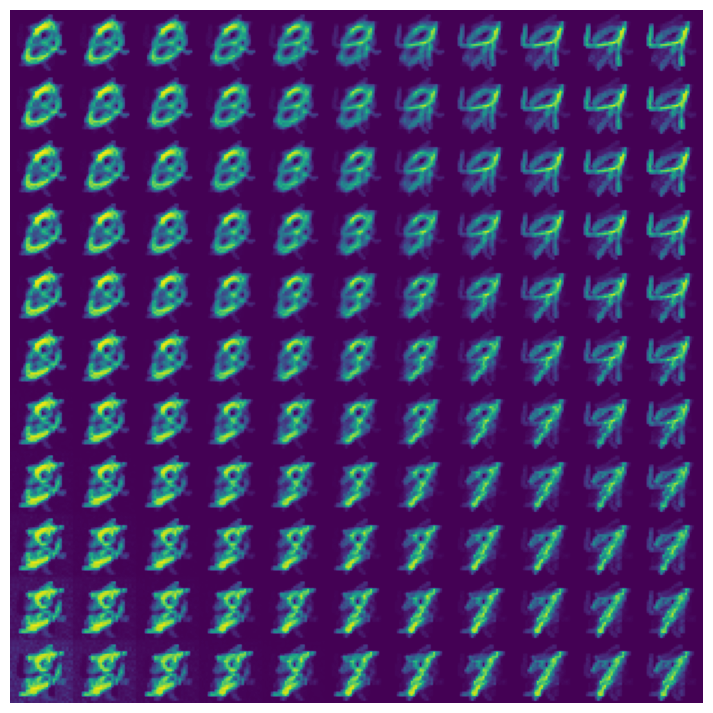

In [51]:
train(10)
plot_generated_images(model)

tensor(160.5550, grad_fn=<DivBackward0>)


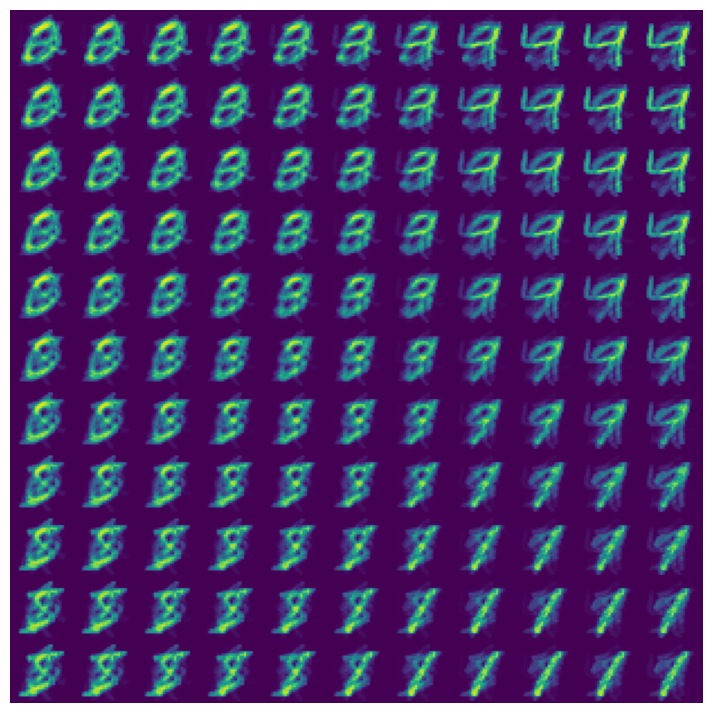

In [52]:
train(10)
plot_generated_images(model)

tensor(150.5058, grad_fn=<DivBackward0>)


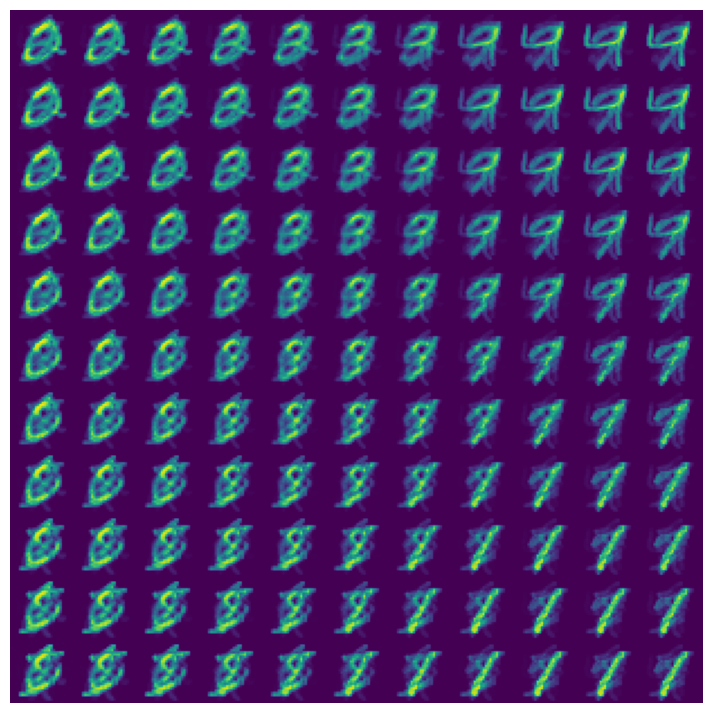

In [53]:
train(10)
plot_generated_images(model)

tensor(149.6147, grad_fn=<DivBackward0>)


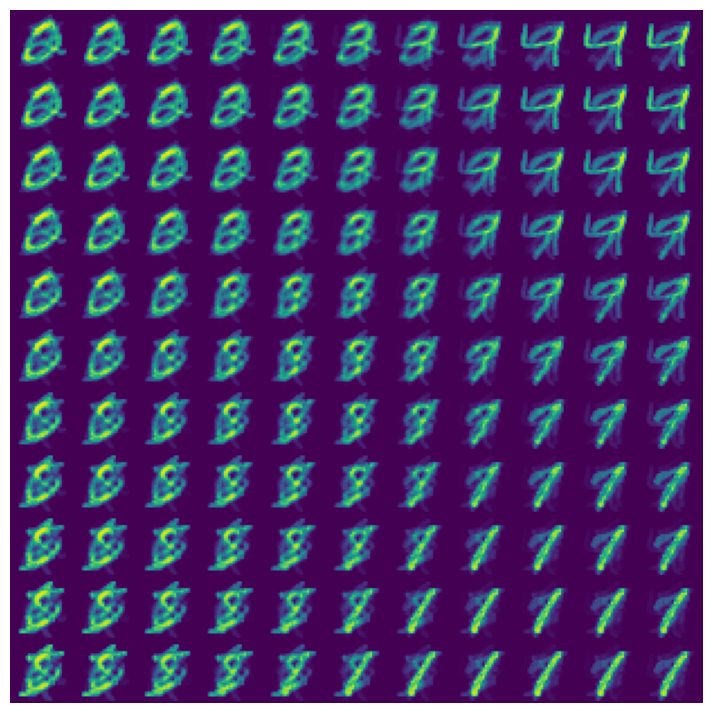

In [54]:
train(10)
plot_generated_images(model)

tensor(165.2372, grad_fn=<DivBackward0>)


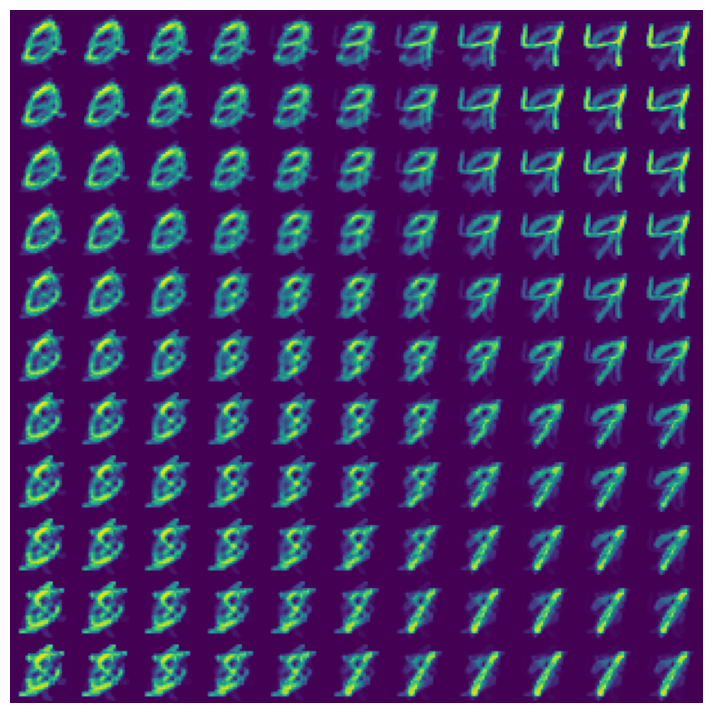

In [55]:
train(10)
plot_generated_images(model)

tensor(159.4306, grad_fn=<DivBackward0>)


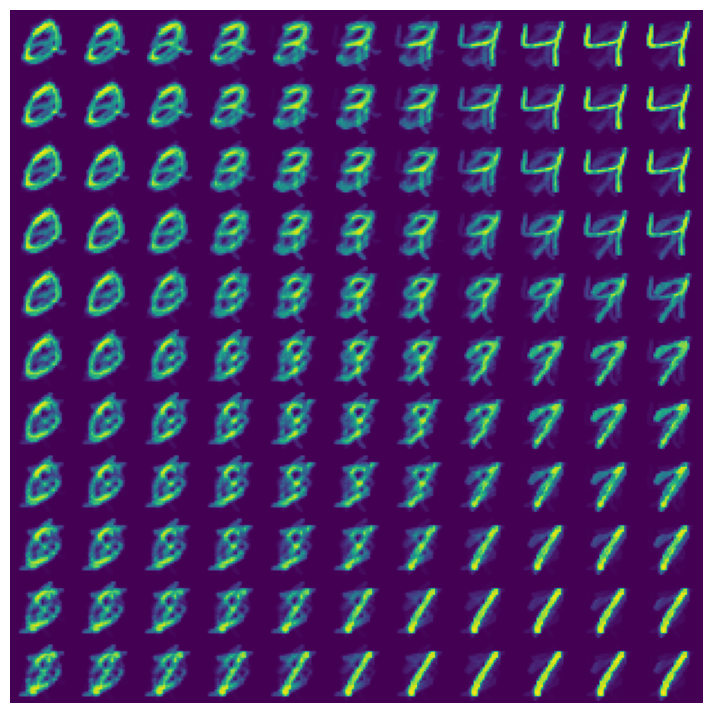

In [56]:
train(100)
plot_generated_images(model)

tensor(157.0126, grad_fn=<DivBackward0>)


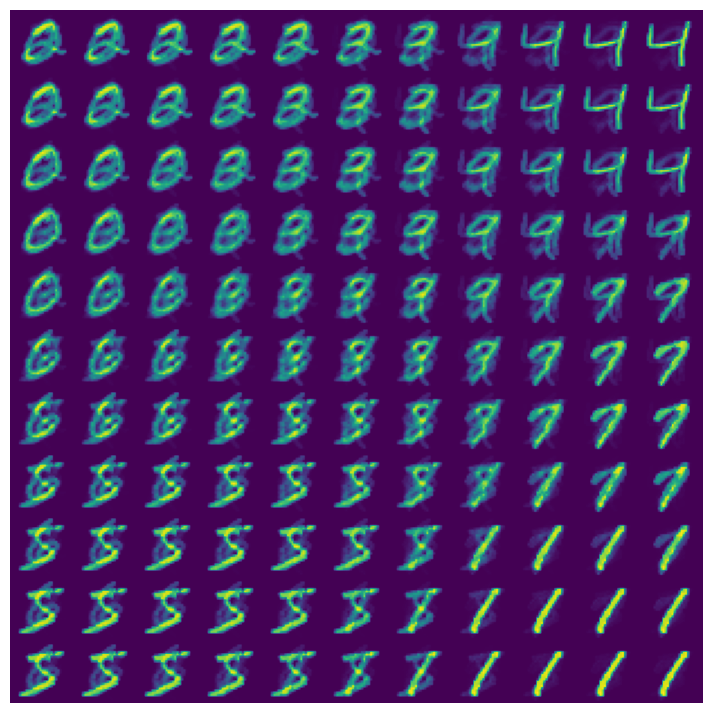

In [57]:
train(1000)
plot_generated_images(model)

# 여러 샘플이 겹친듯한 결과에 대한 연구

In [2]:
from myAE import Manager

manager = Manager()
manager.prepare_data()
manager.set_default_model(2)


def calc_loss(model, x, y, F, device):
    z = model.get_submodule("encoder")(x)
    x_hat = model.get_submodule("decoder")(z)
    loss = F.binary_cross_entropy(x_hat, x, reduction="sum") / len(x)
    return loss


hist = manager.train(calc_loss, epochs=30)

Now, it is working on cuda:1.


100%|██████████| 30/30 [02:31<00:00,  5.05s/it]


In [3]:
manager.save_current_model("default_30eps")